# Loan 데이터 분류모형 예측성능 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')
df

,y,loan,mortgage,job,workyear,delinquency,period,inquire,transact,DTI
0,1,1300,70053,Other,7,2,121.83,0,14,48.20
1,1,1500,13500,Other,4,0,149.47,1,10,40.86
2,1,1500,78553,Other,10,1,107.81,2,25,39.60
3,0,1700,97800,Office,3,0,93.33,0,14,48.65
4,1,1700,30548,Other,9,0,101.47,1,8,37.11
...,...,...,...,...,...,...,...,...,...,...
6986,1,1800,48649,Other,5,2,77.10,1,17,36.44
6987,1,1800,28502,Other,11,0,88.77,0,8,36.88
6988,1,2000,32700,Other,3,2,216.93,1,12,36.83
6989,1,2000,82919,Sales,16,0,115.80,0,13,29.26


In [3]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [4]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## 로지스틱 회귀분석

In [6]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0, max_iter = 1000)
m1.fit(X_train, y_train)
m1_prob = m1.predict_proba(X_test)
pd.DataFrame(m1_prob)

,0,1
0,0.797334,0.202666
1,0.772756,0.227244
2,0.765714,0.234286
3,0.756511,0.243489
4,0.642193,0.357807
...,...,...
2792,0.551095,0.448905
2793,0.740449,0.259551
2794,0.485864,0.514136
2795,0.413873,0.586127


### ROC 커브 및 AUC

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve
# m1_roc=plot_roc_curve(m1, X_test, y_test)

y_pred = m1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [8]:
data = {
    '예상 값': y_pred,
    'FPR': fpr,
    'TPR': tpr,
    'THR': thresholds
}
data

{'예상 값': array([0.20266633, 0.22724367, 0.23428563, ..., 0.51413629, 0.58612702,
        0.40990771]),
 'FPR': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.71475719e-04,
        4.71475719e-04, 9.42951438e-04, 9.42951438e-04, 1.41442716e-03,
        1.41442716e-03, 2.35737860e-03, 2.35737860e-03, 2.82885431e-03,
        2.82885431e-03, 3.77180575e-03, 3.77180575e-03, 4.71475719e-03,
        4.71475719e-03, 5.65770863e-03, 5.65770863e-03, 6.60066007e-03,
        6.60066007e-03, 8.48656294e-03, 8.48656294e-03, 8.95803866e-03,
        8.95803866e-03, 9.42951438e-03, 9.42951438e-03, 9.90099010e-03,
        9.90099010e-03, 1.03724658e-02, 1.03724658e-02, 1.08439415e-02,
        1.08439415e-02, 1.13154173e-02, 1.13154173e-02, 1.17868930e-02,
        1.17868930e-02, 1.27298444e-02, 1.27298444e-02, 1.32013201e-02,
        1.32013201e-02, 1.36727959e-02, 1.36727959e-02, 1.60301744e-02,
        1.60301744e-02, 1.65016502e-02, 1.65016502e-02, 1.74446016e-02,
        1.74446016e-02, 1.

In [9]:
!pip install --upgrade scikit-learn

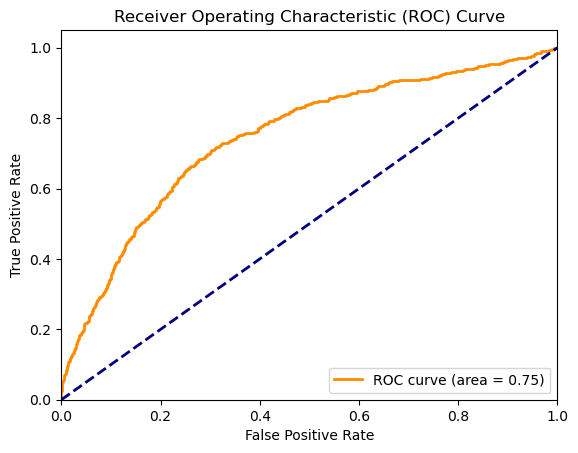

In [10]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 나무 모형

### Pruning : Alpha=0.0, min_impurity_decrease=0.0005,  min_samples_split=2  트리

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install scikit-learn==0.24.2


In [ ]:
conda deactivate

In [2]:
!pip install scikit-learn

In [11]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
m2.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

In [12]:
m2_prob = m2.predict_proba(X_test)
m2_prob

array([[0.00716846, 0.99283154],
       [0.91304348, 0.08695652],
       [0.9574124 , 0.0425876 ],
       ...,
       [0.00716846, 0.99283154],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [13]:
threshold = 0.3
m2_pred = (m2_prob[:,1]>threshold).astype(int)
m2_pred

array([1, 0, 0, ..., 1, 0, 1])

In [15]:
from sklearn.metrics import confusion_matrix
m2_cm = confusion_matrix(y_test, m2_pred)
pd.DataFrame(m2_cm)

,0,1
0,2055,66
1,214,462


In [16]:
# 정확도
accu2 = np.trace(m2_cm)/len(y_test)
print('정확도 :', np.round(accu2,2))

# 특이도, 민감도
spec2, sens2 = np.diag(m2_cm) / np.sum(m2_cm, axis = 1)
print('특이도 :', np.round(spec2,2))
print('민감도 :', np.round(sens2,2))

# 정밀도
prec2 = m2_cm[1,1] / np.sum(m2_cm, axis=0)[1]
print('정밀도 :', np.round(prec2,2))

# F1-score
f1_2 = 2*prec2*sens2 / (prec2+sens2)
print('F1-score :', np.round(f1_2,2))

정확도 : 0.9
특이도 : 0.97
민감도 : 0.68
정밀도 : 0.88
F1-score : 0.77


### ROC 곡선 및 AUC

In [16]:
!pip install --upgrade scikit-learn

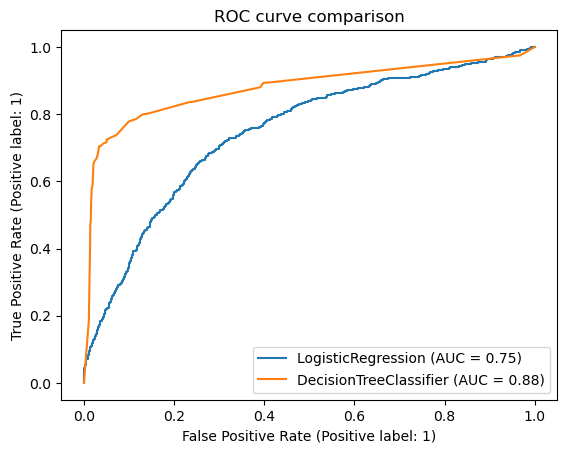

In [19]:
from sklearn.metrics import RocCurveDisplay
m1_roc=RocCurveDisplay.from_estimator(m1, X_test, y_test)
RocCurveDisplay.from_estimator(m2, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

## 다른 분류방법과의 비교

### 신경망분석

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [21]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### 랜덤포레스트

In [22]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### ROC 곡선 및 AUC

In [ ]:
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

In [ ]:
m1_roc = plot_roc_curve(m1, X_test, y_test)
for model in [m2, c_nn, c_svm, c_rf]:
    plot_roc_curve(model, X_test if model != c_nn else X_test_scaled, y_test, ax=m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()